# Slotted ALOHA方式及びTDMAのシミュレーション

In [1]:
#import
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
#ランダムなデータ発生，スループットの理論式の関数
def data_generation_interval(lambda_):
    return int(-1/lambda_*math.log(random.random())+1)

def resend(resend_count):
    if resend_count==1:
        return 0.04
    if resend_count==2:
        return 0.05
    if resend_count>=3:
        return 0.06
def slotted_aloha(N,lambda_):
    G=N*lambda_
    return G*np.exp(-G)
    

'\n成功\n    if resend_count==1:\n        return 0.025\n    if resend_count==2:\n        return 0.01\n    if resend_count>=3:\n        return 0.02\n'

In [3]:
#slotted ALOHA方式のシミュレーションの関数
#データが発生率と局数を代入するとスループットとトラヒックが変える関数
def simulation_slotted_aloha(lambda_,N,resend_flag=False):
    data_list=[]
    count_list=np.zeros(N)
    limit=100000
    successful_slots = 0
    for i in range(N):
        #初めのイベントが起こる時刻をdatalistに格納
        data_list.append(data_generation_interval(lambda_))
        #次探索するべき時刻の重複するindexを集めたリスト．正常なら1
        duplicate_list=[i for i, x in enumerate(data_list) if x == min(data_list)]
    while min(data_list)<100000:
        #print(str(len(duplicate_list))+' '+str(min(data_list)))
        if len(duplicate_list)==1:
                count_list[duplicate_list[0]]=0
                appear_data=data_generation_interval(lambda_)
                data_list[duplicate_list[0]]=appear_data+data_list[duplicate_list[0]]
                successful_slots+=1
        if len(duplicate_list)>=2:
                for j in duplicate_list:
                    count_list[j]+=1
                    #再送ありかなしか
                    if resend_flag is False:
                        data_list[j]=data_generation_interval(lambda_)+data_list[j]
                    else:
                        data_list[j]=data_generation_interval(resend(count_list[j]))+data_list[j]
        #重複listの更新
        duplicate_list=[i for i, x in enumerate(data_list) if x == min(data_list)]
    return successful_slots/limit,N*lambda_



0.0005
0.001
0.0015
0.002
0.0025
0.003
0.0035
0.004
0.0045000000000000005
0.005000000000000001
0.0055
0.006
0.006500000000000001
0.007000000000000001
0.0075
0.008
0.0085
0.009000000000000001
0.009500000000000001
0.01
0.0105
0.011000000000000001
0.0115
0.012
0.0125
0.013000000000000001
0.013500000000000002
0.014
0.0145
0.015000000000000001
0.0155
0.016
0.0165
0.017
0.0175
0.018000000000000002
0.018500000000000003
0.019
0.0195
0.02
0.0205
0.021
0.021500000000000002
0.022000000000000002
0.0225
0.023
0.0235
0.024
0.0245
0.025
0.025500000000000002
0.026000000000000002
0.026500000000000003
0.027
0.0275
0.028
0.0285
0.029
0.029500000000000002
0.030000000000000002
0.0005
0.001
0.0015
0.002
0.0025
0.003
0.0035
0.004
0.0045000000000000005
0.005000000000000001
0.0055
0.006
0.006500000000000001
0.007000000000000001
0.0075
0.008
0.0085
0.009000000000000001
0.009500000000000001
0.01
0.0105
0.011000000000000001
0.0115
0.012
0.0125
0.013000000000000001
0.013500000000000002
0.014
0.0145
0.0150000000000

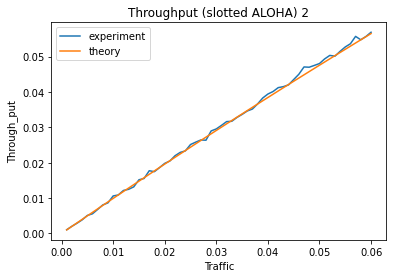

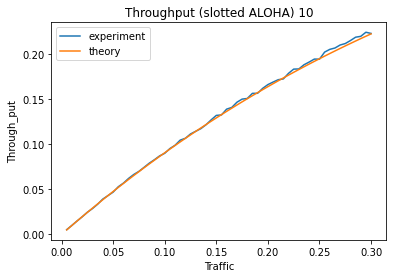

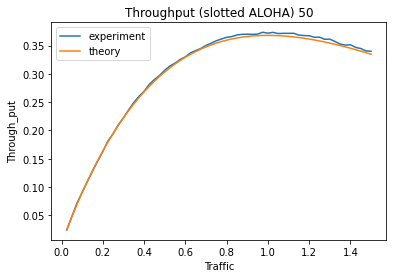

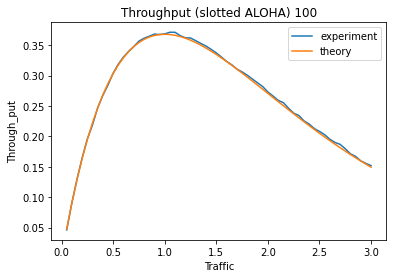

In [422]:
#実行部分
N_list=[2,10,50,100]
data_appear_list=np.arange(0.0005,0.0305,0.0005)
for n in N_list:
    theory_aloha=[]
    traffic_list=[]
    throughput_list=[]
    for j in data_appear_list:
        theory_aloha.append(slotted_aloha(j,n))
    for i in data_appear_list:
        print(i)
        throughput,traffic=simulation_slotted_aloha(i,n,resend_flag=False)
        throughput_list.append(throughput)
        traffic_list.append(traffic)
    fig,ax=plt.subplots()
    ax.plot(traffic_list,throughput_list,label='experiment')
    ax.plot(traffic_list,theory_aloha,label='theory')
    ax.set_xlabel('Traffic')
    ax.set_ylabel('Through_put')
    ax.set_title('Throughput (slotted ALOHA) '+str(n))
    ax.legend()



0.0005
0.001
0.0015
0.002
0.0025
0.003
0.0035
0.004
0.0045000000000000005
0.005000000000000001
0.0055
0.006
0.006500000000000001
0.007000000000000001
0.0075
0.008
0.0085
0.009000000000000001
0.009500000000000001
0.01
0.0105
0.011000000000000001
0.0115
0.012
0.0125
0.013000000000000001
0.013500000000000002
0.014
0.0145
0.015000000000000001
0.0155
0.016
0.0165
0.017
0.0175
0.018000000000000002
0.018500000000000003
0.019
0.0195
0.02
0.0205
0.021
0.021500000000000002
0.022000000000000002
0.0225
0.023
0.0235
0.024
0.0245
0.025
0.025500000000000002
0.026000000000000002
0.026500000000000003
0.027
0.0275
0.028
0.0285
0.029
0.029500000000000002
0.030000000000000002
0.0005
0.001
0.0015
0.002
0.0025
0.003
0.0035
0.004
0.0045000000000000005
0.005000000000000001
0.0055
0.006
0.006500000000000001
0.007000000000000001
0.0075
0.008
0.0085
0.009000000000000001
0.009500000000000001
0.01
0.0105
0.011000000000000001
0.0115
0.012
0.0125
0.013000000000000001
0.013500000000000002
0.014
0.0145
0.0150000000000

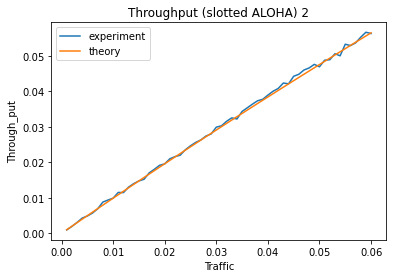

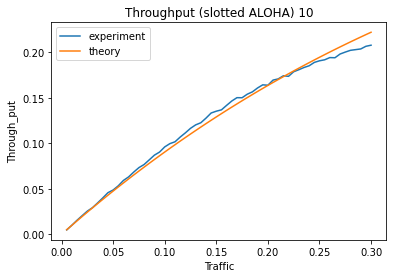

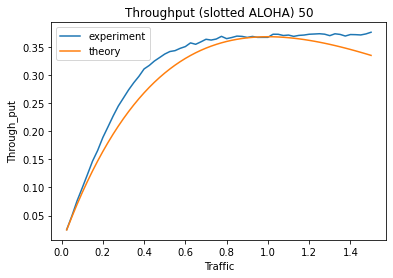

In [663]:
#実行部分
N_list=[2,10,50,100]
data_appear_list=np.arange(0.0005,0.0305,0.0005)
for n in N_list:
    theory_aloha=[]
    traffic_list=[]
    throughput_list=[]
    for j in data_appear_list:
        theory_aloha.append(slotted_aloha(j,n))
    for i in data_appear_list:
        print(i)
        throughput,traffic=simulation_slotted_aloha(i,n,resend_flag=True)
        throughput_list.append(throughput)
        traffic_list.append(traffic)
    fig,ax=plt.subplots()
    ax.plot(traffic_list,throughput_list,label='experiment')
    ax.plot(traffic_list,theory_aloha,label='theory')
    ax.set_xlabel('Traffic')
    ax.set_ylabel('Through_put')
    ax.set_title('Throughput (slotted ALOHA) '+str(n))
    ax.legend()


In [8]:
#発生したdataを各局の使用できる時間帯に割り当てる関数
def tdma_transform(data_list,N):
    delay=0
    for i,x in enumerate(data_list):
        data_time=(x//N)*N+i
        if data_list[i]>data_time:
            data_list[i]=data_time+N
        else:
            data_list[i]=data_time
        delay+=(data_list[i]-data_time)
    return data_list,delay

In [9]:
#delay throughput
def simulation_slotted_aloha_delay(lambda_,N,resend_flag=False):
    delay=0
    data_list=[]
    count_list=np.zeros(N)
    limit=100000
    successful_slots = 0
    for i in range(N):
        #初めのイベントが起こる時刻をdatalistに格納
        data_list.append(data_generation_interval(lambda_))
        #次探索するべき時刻の重複するindexを集めたリスト．正常なら1
        duplicate_list=[i for i, x in enumerate(data_list) if x == min(data_list)]
    while min(data_list)<100000:
        #print(str(len(duplicate_list))+' '+str(min(data_list)))
        if len(duplicate_list)==1:
                count_list[duplicate_list[0]]=0
                appear_data=data_generation_interval(lambda_)
                data_list[duplicate_list[0]]=appear_data+data_list[duplicate_list[0]]
                successful_slots+=1
        if len(duplicate_list)>=2:
                for j in duplicate_list:
                    count_list[j]+=1
                    #再送ありかなしか
                    #delayを出すため一旦避難する
                    temp=data_list[j]
                    #再送をしないと遅延が大きく増える
                    if resend_flag is False:
                        data_list[j]=data_generation_interval(lambda_)+data_list[j]
                    else:
                        #lambda_+count_list[j]*0.01
                        data_list[j]=data_generation_interval(lambda_+count_list[j]*0.01)+data_list[j]
                    #delayを加算する．
                    delay+=(data_list[j]-temp)
        #重複listの更新
        duplicate_list=[i for i, x in enumerate(data_list) if x == min(data_list)]
    return successful_slots/limit,delay

def simulation_tdma_delay(lambda_,N,resend_flag=False):
    data_list=[]
    limit=100000
    count_list=np.zeros(200000)
    successful_slots = 0
    for i in range(N):
        #初めのイベントが起こる時刻をdatalistに格納
        data_list.append(data_generation_interval(lambda_))
        #次探索するべき時刻の重複するindexを集めたリスト．正常なら1
    data_list,delay=tdma_transform(data_list,N)
    while min(data_list)<100000:
        min_index=[i for i, x in enumerate(data_list) if x == min(data_list)][0]
        #tdmaは衝突がない
        #何秒後にデータが発生するか
        appear_data=data_generation_interval(lambda_)
        data_time=appear_data+data_list[min_index]
        data_list[min_index]=(data_time//N)*N+min_index
        if data_list[min_index]>data_time:
            data_list[min_index]=data_time+N
        else:
            data_list[min_index]=data_time
        while count_list[data_list[min_index]]>=1:
            data_list[min_index]+=N
        count_list[data_list[min_index]]+=1
        delay+=(data_list[min_index]-data_time)
        successful_slots+=1
    return successful_slots/limit,delay



0.0005
0.001
0.0015
0.002
0.0025
0.003
0.0035
0.004
0.0045000000000000005
0.005000000000000001
0.0055
0.006
0.006500000000000001
0.007000000000000001
0.0075
0.008
0.0085
0.009000000000000001
0.009500000000000001
0.01
0.0105
0.011000000000000001
0.0115
0.012
0.0125
0.013000000000000001
0.013500000000000002
0.014
0.0145
0.015000000000000001
0.0155
0.016
0.0165
0.017
0.0175
0.018000000000000002
0.018500000000000003
0.019
0.0195
0.02
0.0205
0.021
0.021500000000000002
0.022000000000000002
0.0225
0.023
0.0235
0.024
0.0245
0.025
0.025500000000000002
0.026000000000000002
0.026500000000000003
0.027
0.0275
0.028
0.0285
0.029
0.029500000000000002
0.030000000000000002


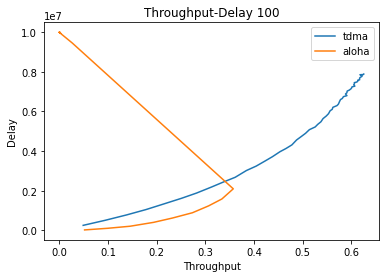

In [10]:
N=100
data_appear_list=np.arange(0.0005,0.0305,0.0005)
tdma_delay_list=[]
tdma_throughput_list=[]
aloha_delay_list=[]
aloha_throughput_list=[]
for i in data_appear_list:
    print(i)
    throughput,delay=simulation_slotted_aloha_delay(i,N,resend_flag=True)
    aloha_throughput_list.append(throughput)
    aloha_delay_list.append(delay)
    throughput,delay=simulation_tdma_delay(i,N,resend_flag=False)
    tdma_throughput_list.append(throughput)
    tdma_delay_list.append(delay)
fig,ax=plt.subplots()
ax.plot(tdma_throughput_list,tdma_delay_list,label='tdma')
ax.plot(aloha_throughput_list,aloha_delay_list,label='aloha')
ax.set_xlabel('Throughput')
ax.set_ylabel('Delay')
ax.set_title('Throughput-Delay '+str(N))
ax.legend()